Import Modules

In [1]:
from numpy import transpose
import numpy as np
import random
import time
import math
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.image import imread

i) Implement 1-D DFT ,on coefficient vectors of two polynomials A(x), B(x)
 by multiplication of Vandermonde matrix . ( O(n2 ) - Complexity)

In [2]:
#1-D DFT
def dft(x):
  v = np.asarray(x, dtype=complex)
  omega = np.exp((-2j * np.pi) / len(v))
  W = []
  for i in range(len(v)):
    row_elements = []
    for j in range(len(v)):
      row_elements.append(omega ** (i * j))
    W.append(row_elements)  
  result = list(np.matmul(W, v))
  return result

ii) Implement 1-D FFT on the same vectors, of A(x) and B(x). Ensure above two steps produce same results. ( O(n logn) – Complexity)

In [3]:
# 1-D FFT
def fft(x):
  v = np.array(x, dtype=complex)
  N = len(x)

  if N == 1:
    return [v[0]]

  X = [0] * N

  even = fft(v[:N:2])
  odd = fft(v[1:N:2])

  for k in range(N//2):
    w = math.e ** (-2j * math.pi * k/N)
    X[k] = even[k] + w * odd[k]
    X[k + N//2] = even[k] - w * odd[k]

  return X

In [4]:
elements = np.random.randint(100, size=(1024))
result_dft = dft(elements)
result_fft = fft(elements)

print(result_dft)
print(result_fft)

# Comparing with NumPy FFT
if np.allclose(dft(elements), np.fft.fft(elements)):
    print("Our DFT and NumPy FFT Match")
else:
    print("Our DFT and NumPy FFT do not Match")

# Check if our DFT and FFT are equal
if np.allclose(result_dft, result_fft):
    print("DFT and FFT results match.")
else:
    print("DFT and FFT results do not match.")

[(50466+0j), (236.42233258890377+925.8817333060248j), (-1151.960272675435-708.5468354751894j), (924.5795235079289-282.79016116480517j), (403.872871180076-716.4538657756362j), (-1211.7204944070156+1534.2908489283702j), (603.3344484416691-603.9732036285216j), (-59.48812310626283-127.16957764284612j), (753.1953444124981+548.3501712404943j), (615.1977813182068+747.6309213248716j), (59.315909850459505+1404.9673291052843j), (-608.6471316870243+3.6609772797439764j), (951.7885368827884-477.61139506069276j), (564.2117565281562-168.58806432110066j), (252.9512198919639-1242.8714401652387j), (-740.2813546570792-813.734833829248j), (982.5578205833949-421.5317624041268j), (-271.5727342960864-894.2389144829756j), (654.3764659060546+863.5540236008494j), (382.0569274730635-1319.6392488589227j), (462.2865664023878+91.73533017581416j), (687.9206787078245-763.3674621749135j), (-296.17098782465365+1172.659282340163j), (-210.7649268372534+151.099837086294j), (621.5001491507139+486.581211795992j), (222.12793

Our DFT and NumPy FFT Match
DFT and FFT results match.


In [5]:
%timeit dft(elements)
%timeit fft(elements)

360 ms ± 12.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.16 ms ± 232 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
entriesA = []
entriesB = []
y = [2 ** x for x in range(2,12)]
print(y)
for i in y: 
  m = np.random.randint(100, size=(i))
  n = np.random.randint(100, size=(i))
  entriesA.append(m)
  entriesB.append(n)


[4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]


iii) Pointwise multiply results of Step 2 to produce C(x) in P-V form

In [7]:
def pointwise_mul(list1, list2):
  products = []
  for num1, num2 in zip(list1, list2):
    products.append(num1 * num2)
  return products

for i in range(len(entriesA)):
  print(pointwise_mul(fft(entriesA[i]), fft(entriesB[i])))

[(40851+0j), (714.9999999999998+2260j), (5795-0j), (715.0000000000002-2260j)]
[(160889+0j), (-2416.245494149591+6800.391813855427j), (2626-127j), (-7839.754505850407-11239.608186144573j), (-261+0j), (-7839.754505850409+11239.608186144573j), (2626+127j), (-2416.2454941495885-6800.391813855427j)]
[(435969+0j), (-6930.745732308356+6025.257954310016j), (-3324.5249250238858-6271.309988484736j), (-5147.02268861323-3803.358129998072j), (-8116+3037j), (-9758.617639568556+2886.2341428234345j), (1018.5249250238886-337.30998848473615j), (-2275.613939509861+10278.850227131521j), (-19125+0j), (-2275.613939509858-10278.850227131521j), (1018.5249250238871+337.3099884847371j), (-9758.617639568556-2886.234142823438j), (-8116-3037j), (-5147.02268861323+3803.358129998069j), (-3324.5249250238876+6271.309988484736j), (-6930.745732308353-6025.257954310018j)]
[(2460544+0j), (-17843.19815072671+20811.889522711273j), (7101.269990539572-979.3380196504959j), (-9253.789193645269-5497.23564001309j), (-4800.5180361

iv) RSA encrypt , with public key , the C(x) in PV form, for transmission security and decrypt with a private
 key and verify .

GENERATE LARGE PRIME NUMBERS AND VERIFY IT THROUGH MILLER-RABIN TEST

In [8]:
def generate_random_number(no_of_bits):
    return random.randrange(2 ** (no_of_bits - 1) + 1, 2 ** no_of_bits - 1)


In [9]:
def generate_prime_list(n):
    prime_list = list()
    for i in range(1,n+1):
        if i > 1:
            for j in range(2,i):
                if(i % j) == 0:
                    break
            else:
                prime_list.append(i)       
    return prime_list
prime_number_list = generate_prime_list(350)

In [10]:
def low_level_prime(n):
    while True:
        num = generate_random_number(n)
        for i in prime_number_list:
            if num % i == 0 and i ** 2 <= num:
                break
            else:
                return num



In [11]:
def Miller_Rabin(n):
	x = 0
	y = n - 1
	while y % 2 == 0:
		y >>= 1
		x += 1
	assert(2 ** x * y == n - 1)

	def trialComposite(t):
		if pow(t, y, n) == 1:
			return False
		for i in range(x):
			if pow(t, 2 ** i * y, n) == n - 1:
				return False
		return True
	witnesses = 35
	for i in range(witnesses):
		t = random.randrange(2, n)
		if trialComposite(t):
			return False
	return True

In [12]:
p_file = open('P.txt','w+')
i = 10000
while i:
    P = 16
    x = low_level_prime(P)
    if not Miller_Rabin(x):
        continue
    else:
        p_file.write("%d\n"%x)
        i = i - 1


In [13]:
q_file = open('Q.txt','w+')
i = 10000
while i:
    Q = 16
    x = low_level_prime(P)
    if not Miller_Rabin(x):
        continue
    else:
        q_file.write("%d\n"%x)
        i = i - 1

 RSA IMPLEMENTATION

In [14]:
def egcd(a, b):
    if b == 0: 
      return (a, 1, 0)
    else:
      d1, x1, y1 = egcd(b, a % b)  
      d = d1
      x = y1
      y = x1 - (a // b) * y1
      return (d, x, y)

In [15]:
def modularInv(a, n):
    d, x, y = egcd(a, n)
    b = 1
    if b % d == 0:
        p= (x * (b / d)) % n
        return p

In [16]:
def is_coprime(a,b):
  gcd,_,_ = egcd(a, b)
  return gcd == 1

In [17]:
class RSA:
    def __init__(self, size):
        a, b = self.rsa()
        self.e = b[0] 
        self.n = b[1]
        self.fullset = (a,b)
        self.d = a[0]
        self.size = size
    
    def random_line(self,fname):
        lines = open(fname).read().splitlines()
        r = random.choice(lines)
        return int(r)
    
    def rsa(self):
        P = self.random_line("P.txt")
        Q = self.random_line("Q.txt")
        print("Value of P",P)
        print("Value of Q",Q)
        e = 7
        tot = (P-1) * (Q-1)
        while (not is_coprime(e, tot)):
          el = [3, 5, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]
          e = random.choice(el)
        n = P * Q
        p = modularInv(e,tot)
        prikey = (p,n)
        
        pubkey = (e,n)
        return (prikey, pubkey)
    
    def encrypt(self, new):
        msgasc = []
        for i in new:
          c = str(complex(i))
          c = c[1:-1]
          l = []
          for j in c:
            l.append(ord(j))
          msgasc.append(l)
        enc = []  
        for a in msgasc:
          encs = []
          for z in a:
            encs.append(pow(z, int(self.e), self.n))
          enc.append(encs)             
        return enc
    
    def decrypt(self, ciph):
        b = []
        for var in ciph:
          str1 = ''
          for pin in var:
            dvar = pow(pin, int(self.d), self.n)
            str1 += chr(dvar)
          b.append(str1)
        deciph = []  
        for i in b:
          deciph.append(complex(i))
        return deciph  

In [18]:
L = RSA(16)
message = pointwise_mul(fft(entriesA[0]), fft(entriesB[0]))

# print(msg)

encrypted = L.encrypt(message)
# print(encrypted)


decrypted = L.decrypt(encrypted)
# print(decrypted)

#check if the original message and decrypted message is same
if np.allclose(message, decrypted):
    print("The original and decrypted message match.")
else:
    print("The original and decrypted message do not match.")

Value of P 45767
Value of Q 42083
The original and decrypted message match.


v) Implement 1-D Inverse FFT (I-FFT) on C(x), in PV form (Interpolation)
 to get C(x) in Coefficient form (CR) Polynomial.

In [19]:
#Inverse FFT
def ifft(x):
    x = np.asarray(x, dtype=complex)
    x_conjugate = np.conjugate(x)

    inverse = fft(x_conjugate)

    inverse = np.conjugate(inverse)
    inverse = inverse / len(x)
    return inverse

In [20]:
elements = np.random.randint(100, size=(1024))

# check our implemented ifft with np's ifft
if np.allclose(ifft(elements), np.fft.ifft(elements)):
    print("Our implemented ifft and NumPy's ifft match.")
else:
    print("Our implemented ifft and NumPy's ifft match.")

Our implemented ifft and NumPy's ifft match.


vi) Verify correctness of C(x) , by comparing with the coefficients generated
 by a Elementary “Convolution For Loop” on the Coefficients of A(x) and B(x)

In [21]:
# fast multiplication
def fast_multiplication(arr1, arr2):
  n = len(arr1)
  for i in range(n, 2 * n): 
    arr1.append(0)
    arr2.append(0)  
  
  arr3 = np.asarray(fft(arr1), dtype=complex)
  arr4 = np.asarray(fft(arr2), dtype=complex)
  
  fast_result = pointwise_mul(arr3, arr4)
  return np.round(ifft(fast_result))
  

In [22]:
# Convolution For Loop
def convol_for(arr1, arr2):
  convol_result = [0] * len(arr1) * 2
  for i in range(len(arr1)):
    for j in range(len(arr2)):
      convol_result[i + j] += arr1[i] * arr2[j]
  return convol_result    

In [23]:
# check if result from fast-mult and convolution for loop are same
if np.allclose(fast_multiplication([3,5,2,0], [3,5,2,0]), convol_for([3,5,2,0], [3,5,2,0])):
    print("The result for fast multiplication and convolution-for loop match.")
else:
    print("The result for fast multiplication and convolution-for loop do not match.")

The result for fast multiplication and convolution-for loop match.


vii) Implement a 2-D FFT and 2-D I-FFT module using your 1-D version (This just means , applying FFT on the Rows First and Columns Next on M x N matrix of numbers)


In [24]:
#2D FFT 
def fft_2d(matrix):
   fftRows = np.asarray([np.fft.fft(row) for row in matrix], dtype=np.complex_)
   fftColumns = np.asarray(transpose([np.fft.fft(column) for column in transpose(fftRows)]), dtype=np.complex_)
   return fftColumns

In [25]:
elements = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])   

if np.allclose(fft_2d(elements), np.fft.fft2(elements)):
    print("Our 2d fft and NumPy's 2d fft match.")
else:
    print("Our 2d fft and NumPy's 2d fft do not match.")

Our 2d fft and NumPy's 2d fft match.


In [26]:
#2-D Inverse FFT
def ifft_2d(matrix):
   fftRows = np.asarray([ifft(row) for row in matrix], dtype=complex)
   fftcolumns = np.asarray(transpose([ifft(column) for column in transpose(fftRows)]), dtype=complex)
   return fftcolumns

In [27]:
if np.allclose(ifft_2d(elements), np.fft.ifft2(elements)):
    print("Our 2d ifft and NumPy's 2d ifft match.")
else:
    print("Our 2d ifft and NumPy's 2d ifft do not match.")

Our 2d ifft and NumPy's 2d ifft match.


viii) Verify your of Step (vii) correctness on a Grayscale matrix ( which has random
 integer values in the range 0-255; 255 → White & 0 → Black)

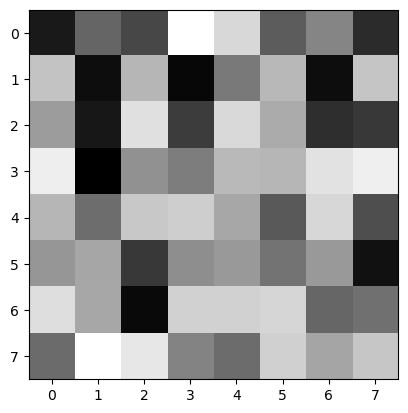

In [28]:
# Verifying correctness of 2d fft on a gray scale matrix
gray_matrix = np.random.randint(0, 256, size=(8, 8), dtype=np.uint8)


my_fft = fft_2d(gray_matrix).real
np_fft = np.fft.fft2(gray_matrix)
my_ifft = ifft_2d(my_fft)
np_ifft = np.fft.ifft2(np_fft)

plt.imshow(gray_matrix, "gray")

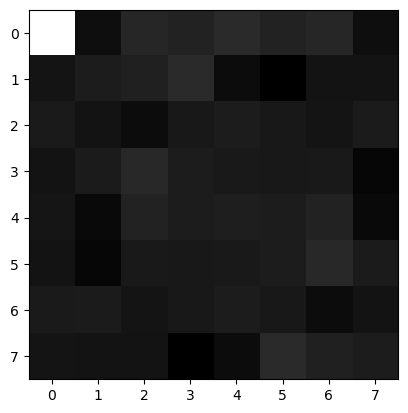

In [29]:
check_2dfft = (my_fft).real
plt.imshow(check_2dfft, "gray")

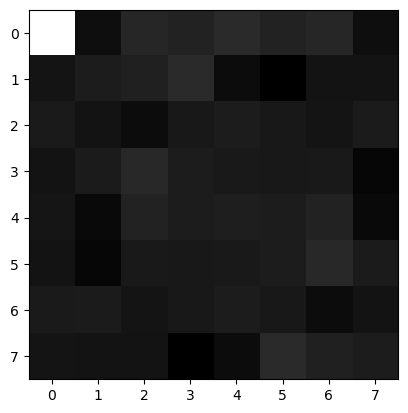

In [30]:
check_np_2dfft = (np_fft).real
plt.imshow(check_np_2dfft, "gray")

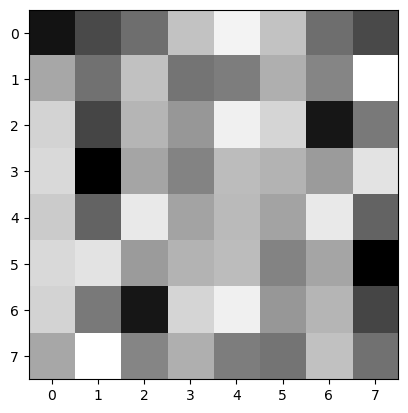

In [31]:
check_2difft = (my_ifft).real
plt.imshow(check_2difft, "gray")

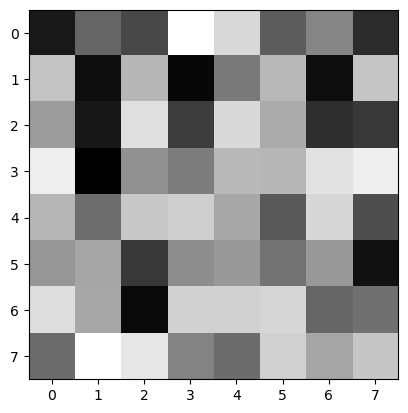

In [32]:
check_np_2difft = (np_ifft).real
plt.imshow(check_np_2difft, "gray")

ix) Apply your 2D-FFT on TIFF/JPG (lossless) Grayscale image and drop Fourier coefficients below some specified magnitude and save the 2D- image to a new file.


x) Apply 2D I-FFT, on the Quantized Grayscale image and render it to observe Image Quality.


In [33]:
from PIL import Image
import seaborn as sns
from matplotlib.image import imread
import matplotlib.pyplot as plt

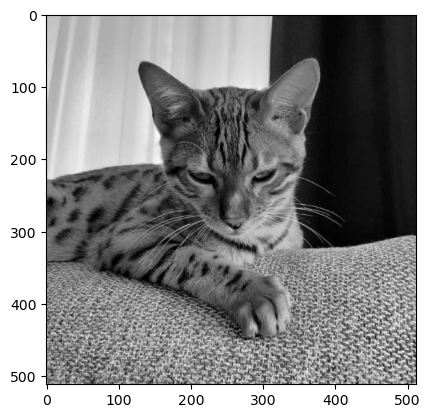

In [34]:
image = imread("2600829.jpeg")
plt.imshow(image, "gray")

In [35]:
def compress(img, cmpr):
  bt = fft_2d(img)
  bt_sort = np.sort(np.abs(bt.ravel()))
  thresh = bt_sort[round(np.floor(((1 - cmpr) * len(bt_sort))))]
  print(thresh)
  bt = bt.ravel()
  for i in range(len(bt)):
    if abs(bt[i]) < thresh:
      bt[i] = 0

  plt.imshow(abs(ifft_2d(bt.reshape(img.shape))), "gray")


Compression % is .1

19079.043272015857


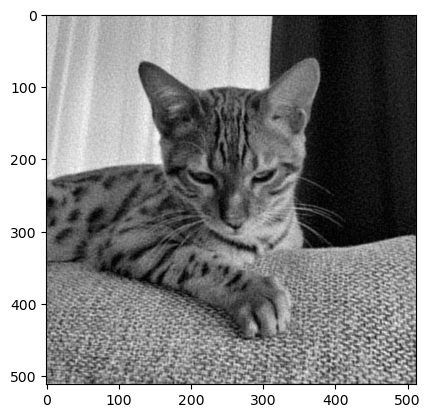

In [36]:
compress(image, .1)

65929.85963515095


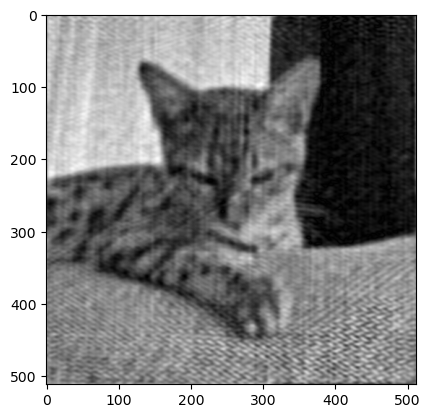

In [37]:
compress(image, .01)

247209.86148381917


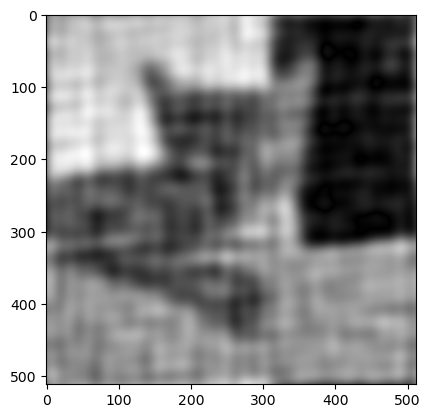

In [38]:
compress(image, .001)